深度优先搜索、广度优先搜索

In [1]:
BEIJING,CHANGCHUN,WULUMUQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK="""
BEIJING CHANGCHUN WULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()


In [2]:
dictionaty={}
connection={
    CHANGCHUN:{BEIJING},
    WULUMUQI:{BEIJING},
    BEIJING:{WULUMUQI,CHANGCHUN,WUHAN,SHENZHEN,NEWYORK},
    NEWYORK:{BEIJING,SHANGHAI},
    SHANGHAI:{NEWYORK,WUHAN},
    WUHAN:{SHANGHAI,BEIJING,GUANGZHOU},
    GUANGZHOU:{WUHAN,BANGKOK},
    SHENZHEN:{WUHAN,BANGKOK},
    BANGKOK:{SHENZHEN,GUANGZHOU}
    
}

In [3]:
import networkx as nx
%matplotlib inline

In [4]:
graph=connection

In [5]:
g=nx.Graph(graph)

d:\anaconda3\envs\aicourse\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


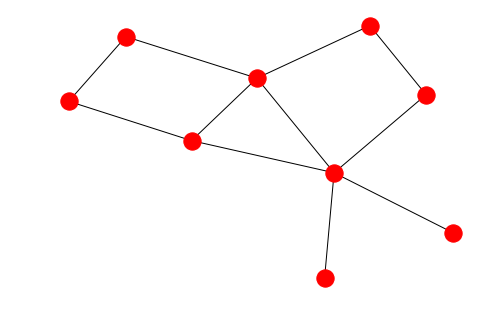

In [6]:
nx.draw(g,with_label=True)

In [7]:
def nagivator(start,destination,connection_graph):
    pathes=[[start]]
    seen=set()
    while pathes:
        path=pathes.pop()
        froniter=path[-1]
        if froniter in seen:continue
        #print('I am standing at:{}'.format(froniter))
        successors=connection_graph[froniter]
        
        for s in successors:
            #print('\t----I am looking forward to:{}'.format(s))
            if s==destination: 
                path.append(s)
                return pathes
            
            else:
                pathes.append(path+[s])
        pathes=sorted(pathes,key=len) 
        
        seen.add(froniter)

In [8]:
print(nagivator(CHANGCHUN,BANGKOK,connection))

[['CHANGCHUN', 'BEIJING', 'WUHAN'], ['CHANGCHUN', 'BEIJING', 'WULUMUQI'], ['CHANGCHUN', 'BEIJING', 'NEWYORK']]


In [9]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)
        


In [10]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

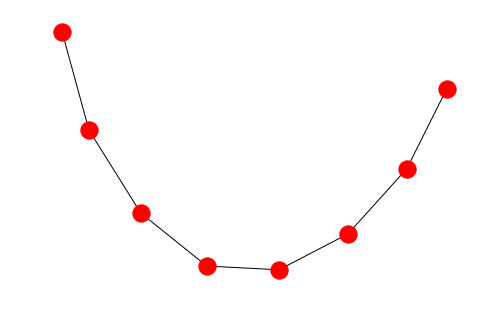

In [11]:
nx.draw(nx.Graph(connection_2))

In [12]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [13]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [14]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [15]:
def draw_route(routes):
    print('🛫->'.join(routes))

In [16]:
allWay=nagivator(CHANGCHUN, BANGKOK, connection)
for i in allWay:
    draw_route(i)

CHANGCHUN🛫->BEIJING🛫->WUHAN
CHANGCHUN🛫->BEIJING🛫->WULUMUQI
CHANGCHUN🛫->BEIJING🛫->NEWYORK


语句生成

In [17]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [18]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [19]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [20]:
import random

In [21]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [22]:
g = parse_grammar(grammar)

In [23]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [24]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [25]:
gene(g)

'这个桌子坐在这个小小的女人'

In [26]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

5-69-71-2
2-3/1*7
2-2/5/35
9*7-2-2
21/1+6-7
4/7/27-6
4/2+6*7
4/6*1/8
1/5+7-9
7*8/9-78
1/1-1-0
8*5+9+1
4-5+4+30
0*6+4*8
1*1+0*9
6-7+9-4
3*8-9-82
8+1*2*3
73+2+3/1
3*7/697-5
